In [17]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [42]:
df = pd.read_csv("copper final dataset.csv", encoding='latin1')

In [43]:
print(len(df['item_date'].unique())) #
print(len(df['customer'].unique())) #
print(len(df['material_ref'].unique()))
print(len(df['product_ref'].unique())) #


253
1170
16564
33


#### null values, shape and data types before dealing with incorrect data 

In [44]:
df.shape

(201006, 14)

In [45]:
# missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

Unnamed: 0           0
id                   2
item_date            1
quantity tons        0
customer             2
country             30
status               2
item type            0
application         24
thickness            1
width                0
material_ref     86253
product_ref          0
selling_price        1
dtype: int64


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201006 entries, 0 to 201005
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     201006 non-null  int64  
 1   id             201004 non-null  object 
 2   item_date      201005 non-null  float64
 3   quantity tons  201006 non-null  object 
 4   customer       201004 non-null  float64
 5   country        200976 non-null  float64
 6   status         201004 non-null  object 
 7   item type      201006 non-null  object 
 8   application    200982 non-null  float64
 9   thickness      201005 non-null  float64
 10  width          201006 non-null  float64
 11  material_ref   114753 non-null  object 
 12  product_ref    201006 non-null  int64  
 13  selling_price  201005 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 21.5+ MB


### Dealing with data in wrong format

In [47]:
# dealing with data in wrong format
# for categorical variables, this step is ignored
# df = df[df['status'].isin(['Won', 'Lost'])]
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')


#### Nan values and shape after dealing with data in wrong format

In [48]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)
df.info()

Unnamed: 0           0
id                   2
item_date            4
quantity tons        1
customer             2
country             30
status               2
item type            0
application         24
thickness            1
width                0
material_ref     86253
product_ref          0
selling_price        1
dtype: int64
(201006, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201006 entries, 0 to 201005
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     201006 non-null  int64  
 1   id             201004 non-null  object 
 2   item_date      201002 non-null  object 
 3   quantity tons  201005 non-null  float64
 4   customer       201004 non-null  float64
 5   country        200976 non-null  float64
 6   status         201004 non-null  object 
 7   item type      201006 non-null  object 
 8   application    200982 non-null  float64
 9   thickness      201005 non-null  float64
 

### Dealing with Missing Values

In [49]:
# material_ref has large set of null values, so replacing them with unknown 
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.drop("material_ref",axis = 1)

In [50]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)

Unnamed: 0        0
id                2
item_date         4
quantity tons     1
customer          2
country          30
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
selling_price     1
dtype: int64
(201006, 13)


In [51]:
df_p=df.copy()

PLOTTING

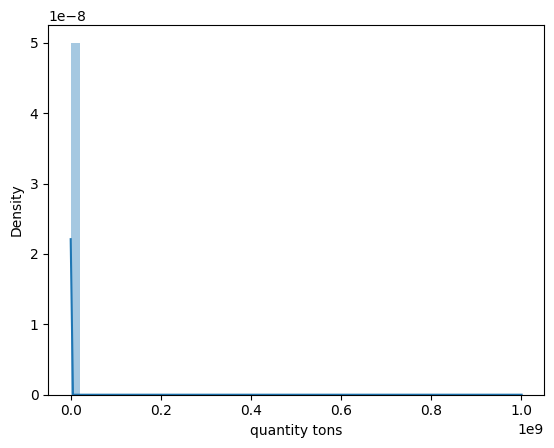

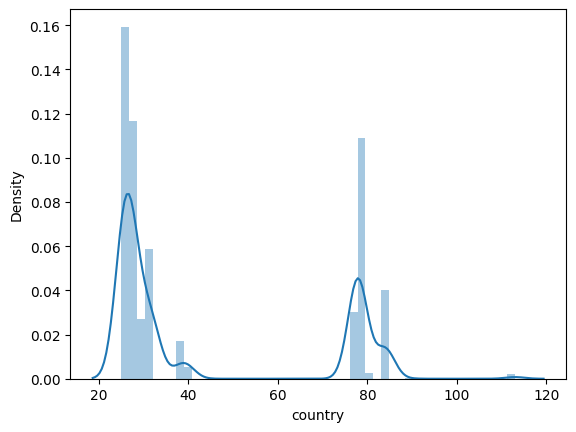

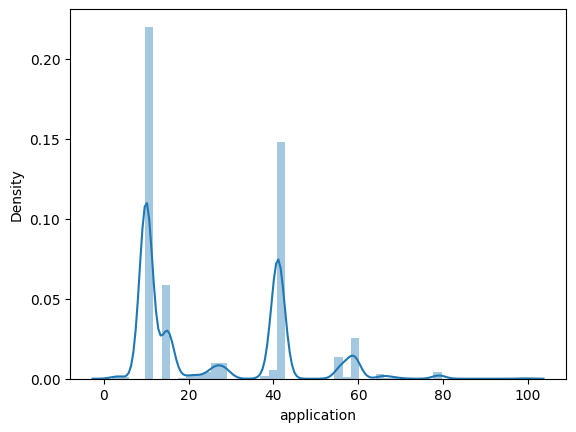

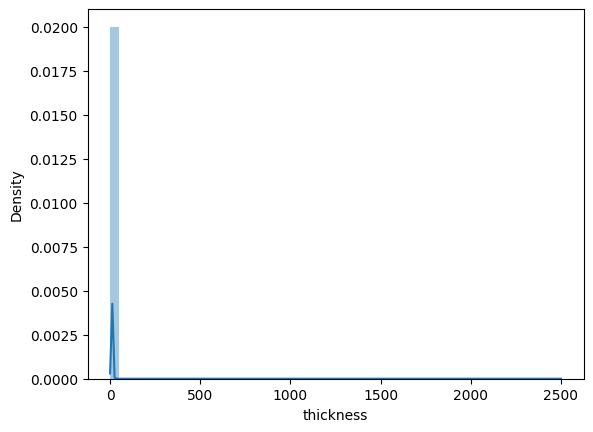

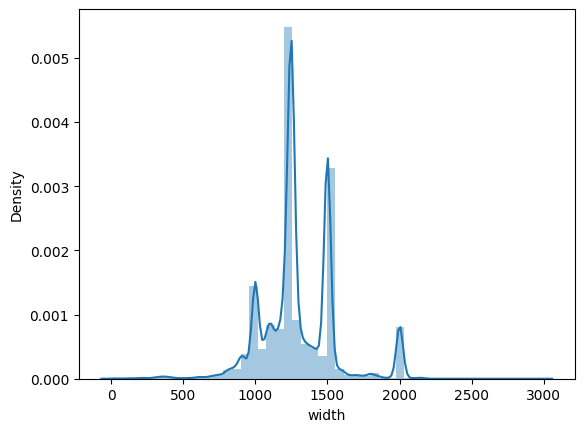

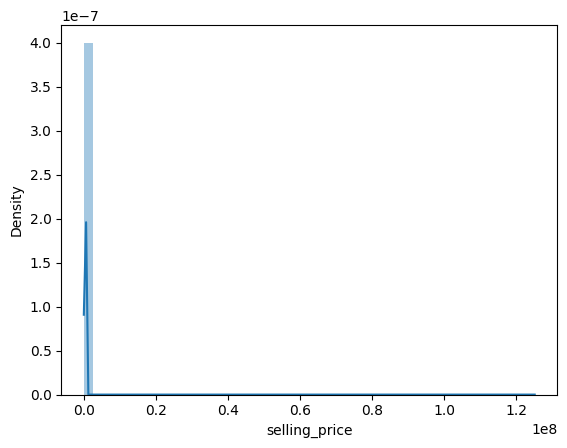

In [52]:
# ['quantity tons','selling_price','application','thickness','width', 'country']
# ['status','item type']

df_p['quantity tons']   # skewed
df_p['country']
df_p['application']
df_p['thickness']       # skewed
df_p['width']           
df_p['selling_price']   # skewed

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_p['quantity tons'])
plt.show()
sns.distplot(df_p['country'])
plt.show()
sns.distplot(df_p['application'])
plt.show()
sns.distplot(df_p['thickness'])
plt.show()
sns.distplot(df_p['width'])
plt.show()
sns.distplot(df_p['selling_price'])
plt.show()


In [54]:
import numpy as np
mask1 = df_p['selling_price'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'selling_price'] = np.nan

mask1 = df_p['quantity tons'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'quantity tons'] = np.nan

mask1 = df_p['thickness'] <= 0
print(mask1.sum())


7
4
0


In [55]:
df_p.isnull().sum()

Unnamed: 0        0
id                2
item_date         4
quantity tons     5
customer          2
country          30
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
selling_price     8
dtype: int64

In [56]:
df_p.dropna(inplace=True)
len(df_p)

200952

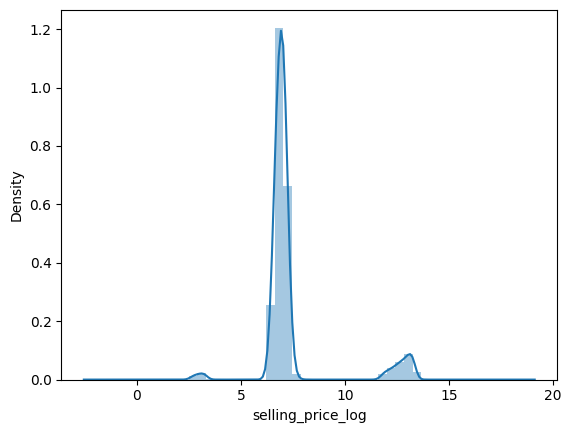

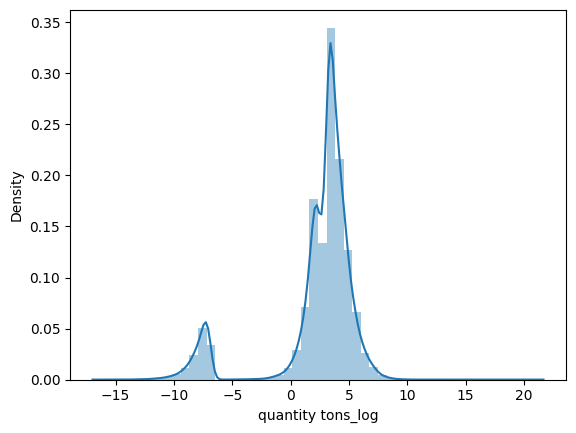

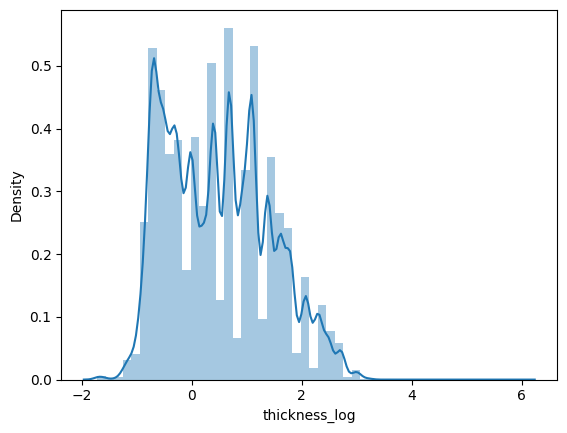

In [57]:
import numpy as np
df_p['selling_price_log'] = np.log(df_p['selling_price'])
sns.distplot(df_p['selling_price_log'])
plt.show()

df_p['quantity tons_log'] = np.log(df_p['quantity tons'])
sns.distplot(df_p['quantity tons_log'])
plt.show()

df_p['thickness_log'] = np.log(df_p['thickness'])
sns.distplot(df_p['thickness_log'])
plt.show()
# reverts log
# df_p['revertes'd_value] = np.exp(df_p['selling_price_log'])
# sns.distplot(df_p['reverted_values'])
# plt.show()

<Axes: xlabel='selling_price_log'>

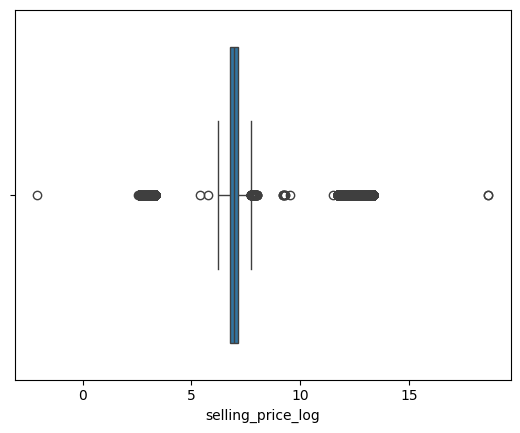

In [58]:
sns.boxplot(data  =df_p,x = "selling_price_log")

In [59]:
df_p.head()

,Unnamed: 0,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log,quantity tons_log,thickness_log
0,0,74B1B176-A388-4025-ACCF-F4E0E6B670F0,2023-09-03,13.359274,30161088.0,78.0,Won,W,10.0,2.0,1250.0,1670798778,698.75,6.549293,2.592211,0.693147
1,1,33D24C29-C735-4C8D-992F-5781023385CC,2023-08-25,10.652652,30198074.0,26.0,Not lost for AM,S,15.0,2.0,1500.0,164337175,887.50,6.788409,2.365809,0.693147
2,2,707698A9-9D4E-44F5-BAB7-A1B09638596F,2024-02-05,7.357345,30147722.0,78.0,To be approved,W,41.0,0.5,1240.0,611993,1707.50,7.442786,1.995699,-0.693147
3,3,6C6F75D2-CC38-493C-9AFE-E82C3F40E08C,2023-12-10,41.251173,30401985.0,27.0,Won,S,10.0,1.0,1000.0,1693867550,1061.25,6.967203,3.719680,0.000000
4,4,7D6C9578-2E1F-4093-B2E6-D1010D60E857,2023-08-26,24.200114,30205312.0,32.0,Won,W,10.0,2.0,1500.0,1332077137,781.25,6.660895,3.186357,0.693147


In [60]:
x=df_p[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

In [61]:
#df.to_csv("cleaned_cu",index = False)

<Axes: >

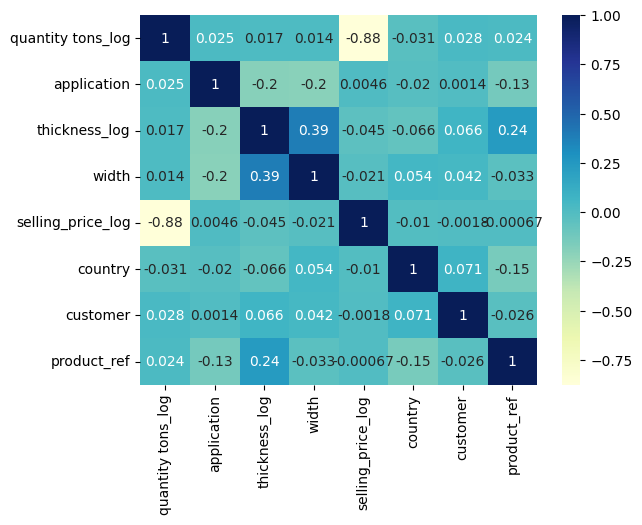

In [62]:
sns.heatmap(x, annot=True, cmap="YlGnBu")

## DECISION TREE REGRESSOR 

   #### 1 Encode categorical features
   #### 2 Test and Train split
   #### 3 Define Hyperparameters for GridSearchCV
   #### 4 Train the DecisionTreeRegressor with best parameters
   #### 5 Evalution metrics
   #### 6 Predict the selling price for new values
   #### 7 Save the DecisionTreeRegressor model

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

X=df_p[['quantity tons_log','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_p['selling_price_log']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()

# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)


Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean squared error: 0.2667241314855747
R-squared: 0.920124536008384


In [64]:
import numpy as np

# Example new sample data
new_sample = np.array([[np.log(40), 'PL', 10, np.log(250), 0, 28, 30202938, 1670798778]])

# Assuming 'PL' and 'Won' are your categorical variables
new_sample_ohe = ohe.transform(new_sample[:, [1]]).toarray()  # Encode 'PL'

# Concatenate numerical features with encoded categorical features
new_sample = np.concatenate((new_sample[:, [0, 2, 3, 4, 5, 6, 7]], new_sample_ohe), axis=1)

# Scale the new sample using the previously fitted scaler
new_sample1 = scaler.transform(new_sample)

# Predict using the best model obtained from GridSearchCV
new_pred = best_model.predict(new_sample1)

# Print the predicted selling price
print('Predicted selling price:', np.exp(new_pred))


Predicted selling price: [1264.6011627]


In [65]:
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(df[['status']])

OneHotEncoder(handle_unknown='ignore')

In [66]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [67]:
print(len(df_p))
df_p.head(3)

200952


,Unnamed: 0,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log,quantity tons_log,thickness_log
0,0,74B1B176-A388-4025-ACCF-F4E0E6B670F0,2023-09-03,13.359274,30161088.0,78.0,Won,W,10.0,2.0,1250.0,1670798778,698.75,6.549293,2.592211,0.693147
1,1,33D24C29-C735-4C8D-992F-5781023385CC,2023-08-25,10.652652,30198074.0,26.0,Not lost for AM,S,15.0,2.0,1500.0,164337175,887.50,6.788409,2.365809,0.693147
2,2,707698A9-9D4E-44F5-BAB7-A1B09638596F,2024-02-05,7.357345,30147722.0,78.0,To be approved,W,41.0,0.5,1240.0,611993,1707.50,7.442786,1.995699,-0.693147


In [68]:
df_c = df_p[df_p['status'].isin(['Won', 'Lost'])]
len(df_c)

150429

## DECISION TREE CLASSIFIER

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = df_c['status']
X= df_c[['quantity tons_log','item type','application','thickness_log','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


Accuracy: 0.8916771920494582
Confusion Matrix:
[[ 5156  1607]
 [ 1652 21671]]


Confusion Matrix:
[[ 5156  1607]
 [ 1652 21671]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6763
           1       0.93      0.93      0.93     23323

    accuracy                           0.89     30086
   macro avg       0.84      0.85      0.84     30086
weighted avg       0.89      0.89      0.89     30086



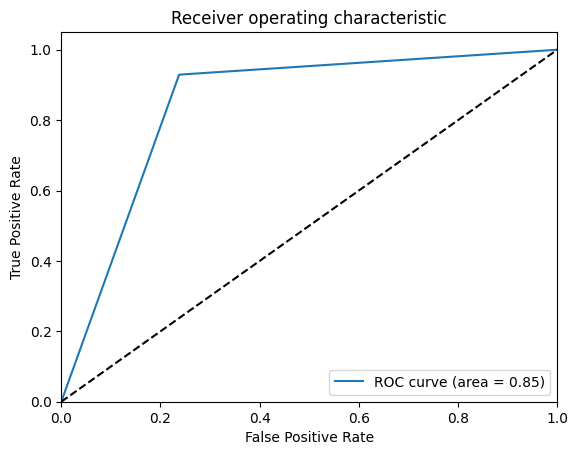

In [70]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [71]:
import numpy as np

# Assuming `ohe`, `scaler`, and `dtc` are already defined as in your previous code

# Define your input sample
new_sample = np.array([[np.log(700), 'W', 10, np.log(2), 1500, 28.0, 30202938, 1670798778]])

# Encoding categorical variable 'item type'
new_sample_ohe = ohe.transform(new_sample[:, [1]]).toarray()

# Concatenate numerical and encoded categorical features
new_sample_encoded = np.concatenate((new_sample[:, [0, 2, 3, 4, 5, 6, 7]], new_sample_ohe), axis=1)

# Scale the input sample using the same scaler
new_sample_scaled = scaler.transform(new_sample_encoded)

# Make predictions using the Decision Tree Classifier
new_pred = dtc.predict(new_sample_scaled)

# Interpret the prediction
if new_pred == 1:
    print('The status is: Won')
else:
    print('The status is: Lost')


The status is: Lost


In [72]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [73]:
numeric_columns = df_p.select_dtypes(include=[np.number]).columns

# Calculate minimum and maximum values for numeric columns
min_values = df_p[numeric_columns].min()
max_values = df_p[numeric_columns].max()

# Print column names along with their minimum and maximum values
print("Numeric column-wise minimum and maximum values:")
for col in numeric_columns:
    print(f"{col}: Min = {min_values[col]}, Max = {max_values[col]}")

Numeric column-wise minimum and maximum values:
Unnamed: 0: Min = 0.0, Max = 201005.0
quantity tons: Min = 1.0904939053257845e-07, Max = 1000000000.0
customer: Min = 12458.0, Max = 30408185.0
country: Min = 25.0, Max = 113.0
application: Min = 2.0, Max = 99.0
thickness: Min = 0.18, Max = 400.0
width: Min = 1.0, Max = 2990.0
product_ref: Min = 611728.0, Max = 1722207579.0
selling_price: Min = 0.125, Max = 125001268.75
selling_price_log: Min = -2.0794415416798357, Max = 18.643834445215063
quantity tons_log: Min = -16.03146493319492, Max = 20.72326583694641
thickness_log: Min = -1.7147984280919266, Max = 5.991464547107982


In [74]:
df_p[df_p["quantity tons"]<0]

,Unnamed: 0,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log,quantity tons_log,thickness_log


In [78]:
df_p.loc[df_p['quantity tons'] < 0, 'quantity tons'] *= -1

In [80]:
df_p

,Unnamed: 0,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log,quantity tons_log,thickness_log
0,0,74B1B176-A388-4025-ACCF-F4E0E6B670F0,2023-09-03,13.359274,30161088.0,78.0,Won,W,10.0,2.00,1250.0,1670798778,698.75000,6.549293,2.592211,0.693147
1,1,33D24C29-C735-4C8D-992F-5781023385CC,2023-08-25,10.652652,30198074.0,26.0,Not lost for AM,S,15.0,2.00,1500.0,164337175,887.50000,6.788409,2.365809,0.693147
2,2,707698A9-9D4E-44F5-BAB7-A1B09638596F,2024-02-05,7.357345,30147722.0,78.0,To be approved,W,41.0,0.50,1240.0,611993,1707.50000,7.442786,1.995699,-0.693147
3,3,6C6F75D2-CC38-493C-9AFE-E82C3F40E08C,2023-12-10,41.251173,30401985.0,27.0,Won,S,10.0,1.00,1000.0,1693867550,1061.25000,6.967203,3.719680,0.000000
4,4,7D6C9578-2E1F-4093-B2E6-D1010D60E857,2023-08-26,24.200114,30205312.0,32.0,Won,W,10.0,2.00,1500.0,1332077137,781.25000,6.660895,3.186357,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201001,201001,27380BD7-CD26-4CA7-A14E-945AF12F9F36,2024-01-22,27.432895,30267349.0,84.0,Not lost for AM,S,10.0,2.00,1410.0,1668701718,1172.53750,7.066925,3.311743,0.693147
201002,201002,C9530723-60F7-433C-A673-BC522FE98BB5,2023-10-05,154.952880,30344219.0,32.0,Won,PL,10.0,0.80,1040.0,628377,788.75000,6.670449,5.043121,-0.223144
201003,201003,AZ754C40-CB04-4B1F-91C9-86013391EC64,2023-09-11,0.000921,30196886.0,84.0,Unknown,S,10.0,4.43,1202.0,1670798778,217553.25986,12.290199,-6.990044,1.488400
201004,201004,12DCDBB5-1B0E-4DF3-A014-9E4EDEAD13A7,2023-12-18,7.347223,30157111.0,78.0,Won,W,41.0,1.40,1400.0,164141591,1093.75000,6.997367,1.994322,0.336472


In [1]:
import pyodbc
import pickle

# Connection parameters
server = r'DESKTOP-LTH7KN1\SQLEXPRESS'
database = 'namsql'
connection_string = fr'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

def fetch_data(query):
    try:
        # Establish a connection to the SQL Server
        conn = pyodbc.connect(connection_string)
        cursor = conn.cursor()
        cursor.execute(query)
        data = cursor.fetchall()
        conn.close()
        return data
    except Exception as e:
        print(f"Error: {e}")
        return None

# Example query
query = "SELECT TOP 5 selling_price FROM copper"

# Fetch data
data = fetch_data(query)

# Save connection parameters and data to a pickle file
with open('sql_data.pkl', 'wb') as f:
    pickle.dump((connection_string, data), f)
    print("Connection parameters and data saved to sql_data.pkl")

Connection parameters and data saved to sql_data.pkl


In [2]:
import pyodbc
import pickle

# Connection parameters
server =  r'DESKTOP-LTH7KN1\SQLEXPRESS'
database = 'namsql'
connection_string = fr'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

def fetch_data(query):
    try:
        # Establish a connection to the SQL Server
        conn = pyodbc.connect(connection_string)
        cursor = conn.cursor()
        cursor.execute(query)
        data = cursor.fetchall()
        conn.close()
        return data
    except Exception as e:
        print(f"Error: {e}")
        return None

# Example query
query = "SELECT TOP 5 selling_price FROM Copper"

# Fetch data
data = fetch_data(query)

for item in data:
    print(item)

(1298.75,)
(793.75,)
(875.0,)
(818.75,)
(1256.25,)


In [7]:

# Function to execute a query and save the results to a .pkl file
def execute_and_save_query(query, file_name):
    cursor.execute(query)
    results = cursor.fetchall()
    columns = [column[0] for column in cursor.description]
    df = pd.DataFrame.from_records(results, columns=columns)
    with open(file_name, 'wb') as file:
        pickle.dump(df, file)
    print(f"Data saved to {file_name}")

#The maximum valid quantity-tons ordered in each item-type category.
query = """
    SELECT item_type, MAX(quantity_tons) AS max_quantity_tons
FROM copper
GROUP BY item_type;

"""
execute_and_save_query(query, 'country_sales.pkl')

# 2. b) For which application, the average order quantity is the highest and the lowest?

query = """
      with cte as(
select application,avg(quantity_tons) as avg_qty from copper group by application),
app_qty as(
select *,dense_rank() over(order by avg_qty desc) as h_rn,dense_rank() over(order by avg_qty) as l_rn from cte)
select application,round(avg_qty,0) as avg_qty from app_qty where h_rn = 1 or l_rn = 1 order by avg_qty desc;
"""
execute_and_save_query(query, 'application_avg_qty.pkl')

#c) Which item type has the max number of ‘Win’ status?
query = """
    SELECT item_type, COUNT(status) AS win_cnt 
    FROM copper 
    WHERE status = 'Won' 
    GROUP BY item_type 
    ORDER BY COUNT(status) DESC
"""
execute_and_save_query(query, 'item_type_win_count.pkl')

#d) N number of customers who are top and bottom contributors in Revenue. User should have an option to choose the value of n. Return order_id and customer_id
 # User-defined value for N
query = f"""DECLARE @N INT = 2;

    WITH RevenueRankings AS (
    SELECT 
        customer,
        id AS order_id,
        ROUND(SUM(selling_price), 0) AS revenue,
        ROW_NUMBER() OVER (ORDER BY SUM(selling_price) DESC) AS TopRank,
        ROW_NUMBER() OVER (ORDER BY SUM(selling_price) ASC) AS BottomRank
    FROM copper GROUP BY customer, id)
SELECT customer,order_id,revenue,'Top' AS RankType FROM RevenueRankings WHERE TopRank <= @N
UNION ALL
SELECT customer,order_id,revenue,'Bottom' AS RankType FROM RevenueRankings WHERE BottomRank <= @N
ORDER BY RankType, revenue DESC
"""
execute_and_save_query(query, 'top_bottom_customers.pkl')

# 5. e) Country-wise sum of sales.
query = """
    SELECT country, ROUND(SUM(selling_price), 0) AS sales 
    FROM copper 
    GROUP BY country 
    ORDER BY SUM(selling_price) DESC
"""
execute_and_save_query(query, 'country_sales_2.pkl')

# Close the cursor and connection
cursor.close()
conn.close()


Data saved to country_sales.pkl
Data saved to application_avg_qty.pkl
Data saved to item_type_win_count.pkl
Data saved to top_bottom_customers.pkl
Data saved to country_sales_2.pkl
